The file contains the adjacency list representation of a simple undirected graph. There are 200 vertices labeled 1 to 200. The first column in the file represents the vertex label, and the particular row (other entries except the first column) tells all the vertices that the vertex is adjacent to. So for example, the 6^{th}6 
th
  row looks like : "6	155	56	52	120	......". This just means that the vertex with label 6 is adjacent to (i.e., shares an edge with) the vertices with labels 155,56,52,120,......,etc

Your task is to code up and run the randomized contraction algorithm for the min cut problem and use it on the above graph to compute the min cut. (HINT: Note that you'll have to figure out an implementation of edge contractions. Initially, you might want to do this naively, creating a new graph from the old every time there's an edge contraction. But you should also think about more efficient implementations.) (WARNING: As per the video lectures, please make sure to run the algorithm many times with different random seeds, and remember the smallest cut that you ever find.) Write your numeric answer in the space provided. So e.g., if your answer is 5, just type 5 in the space provided.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import time

plt.style.use("ggplot")

%matplotlib inline

In [16]:
file = open("data/mincut.txt").read()

In [30]:
listed = file.split(sep = "\n")[:-1]

In [41]:
dictionary = {}
for element in listed:
    listed_element = [int(x) for x in element.split(sep="\t")[:-1]]
    dictionary[listed_element[0]] = listed_element[1:]

In [42]:
dictionary

{1: [37,
  79,
  164,
  155,
  32,
  87,
  39,
  113,
  15,
  18,
  78,
  175,
  140,
  200,
  4,
  160,
  97,
  191,
  100,
  91,
  20,
  69,
  198,
  196],
 2: [123,
  134,
  10,
  141,
  13,
  12,
  43,
  47,
  3,
  177,
  101,
  179,
  77,
  182,
  117,
  116,
  36,
  103,
  51,
  154,
  162,
  128,
  30],
 3: [48,
  123,
  134,
  109,
  41,
  17,
  159,
  49,
  136,
  16,
  130,
  141,
  29,
  176,
  2,
  190,
  66,
  153,
  157,
  70,
  114,
  65,
  173,
  104,
  194,
  54],
 4: [91,
  171,
  118,
  125,
  158,
  76,
  107,
  18,
  73,
  140,
  42,
  193,
  127,
  100,
  84,
  121,
  60,
  81,
  99,
  80,
  150,
  55,
  1,
  35,
  23,
  93],
 5: [193,
  156,
  102,
  118,
  175,
  39,
  124,
  119,
  19,
  99,
  160,
  75,
  20,
  112,
  37,
  23,
  145,
  135,
  146,
  73,
  35],
 6: [155,
  56,
  52,
  120,
  131,
  160,
  124,
  119,
  14,
  196,
  144,
  25,
  75,
  76,
  166,
  35,
  87,
  26,
  20,
  32,
  23],
 7: [156,
  185,
  178,
  79,
  27,
  52,
  144,
  107,
  78,
 

In [45]:
pairs = []
for key in dictionary:
    for value in dictionary[key]:
        pairs.append([key, value])

In [49]:
G = nx.from_dict_of_lists(dictionary)

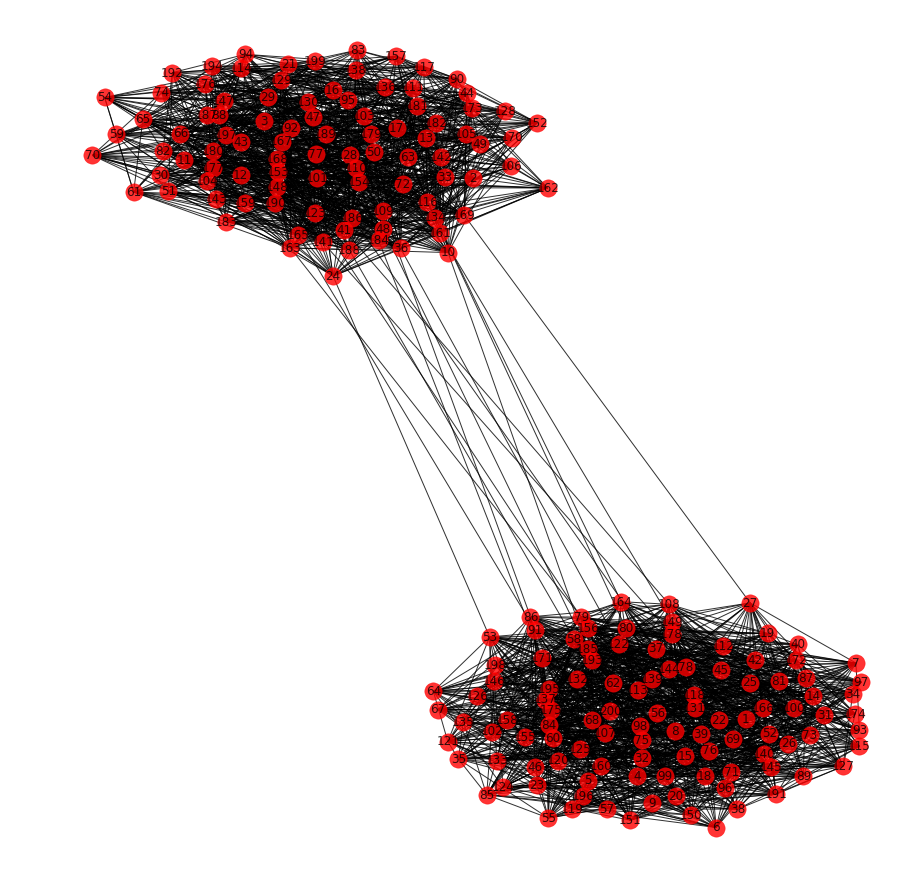

In [63]:
plt.figure(figsize=(12,12))

nx.draw(G, 
        with_labels=True,
        alpha=0.8)
plt.show()

In [85]:
G100 = nx.dense_gnm_random_graph(100, 500)

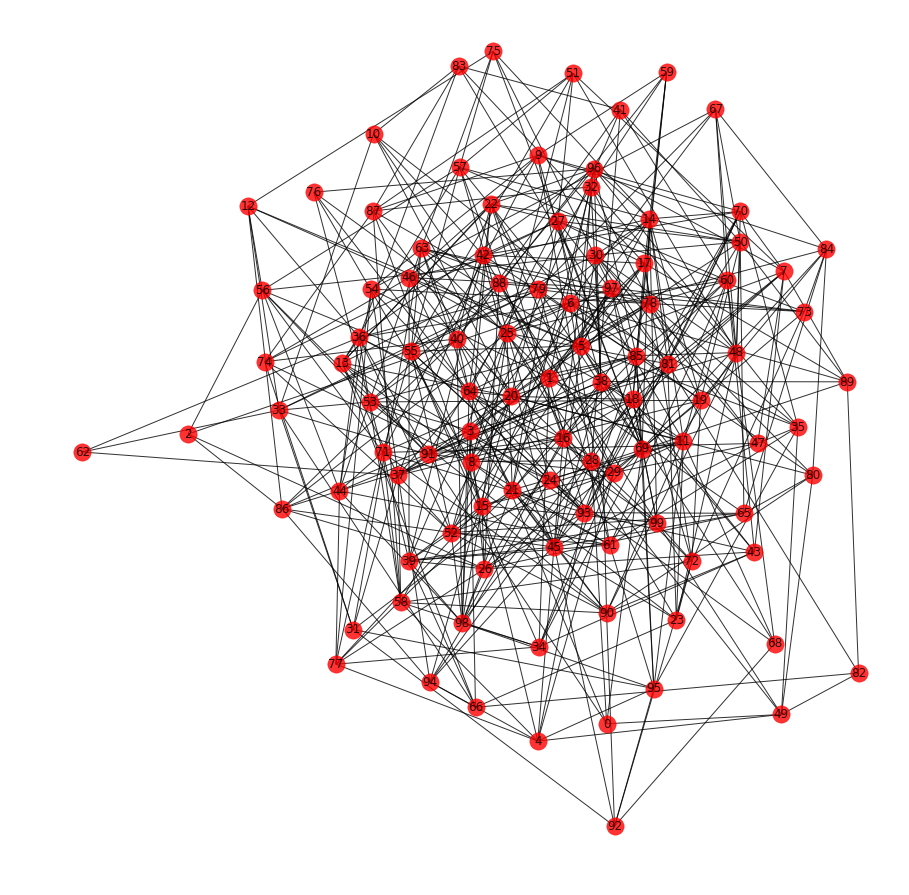

In [86]:
plt.figure(figsize=(12,12))

nx.draw(G100, 
        with_labels=True,
        alpha=0.8)
plt.show()

In [88]:
nx.convert.to_dict_of_lists(G100)

{0: [28, 49, 64, 69, 91],
 1: [3, 11, 17, 34, 37, 54, 63, 65, 85, 88, 93, 96, 97],
 2: [6, 26, 56, 86],
 3: [1, 6, 8, 17, 22, 26, 48, 53, 86, 90, 93, 98],
 4: [8, 16, 29, 49, 58, 77, 93, 94, 95],
 5: [7,
  12,
  14,
  27,
  30,
  32,
  35,
  37,
  43,
  45,
  46,
  50,
  53,
  55,
  63,
  68,
  69,
  78,
  97],
 6: [2, 3, 15, 19, 25, 35, 36, 57, 60, 61, 67, 89],
 7: [5, 18, 24, 43, 47, 51, 70, 81, 89, 96],
 8: [3, 4, 13, 16, 17, 23, 28, 41, 61, 66, 74, 76],
 9: [13, 28, 38, 59, 63, 70, 71, 84, 87],
 10: [20, 25, 33, 42, 81, 83],
 11: [1, 14, 15, 20, 21, 23, 29, 38, 60, 68, 69, 83, 95],
 12: [5, 33, 36, 46, 56, 75, 86],
 13: [8, 9, 20, 22, 24, 36, 37, 57, 66, 88, 91],
 14: [5, 11, 19, 20, 25, 30, 46, 50, 57, 69, 70, 75, 81, 96, 99],
 15: [6, 11, 17, 25, 26, 29, 39, 55, 77, 87, 90, 98, 99],
 16: [4, 8, 18, 22, 29, 36, 49, 57, 60, 91, 96, 98],
 17: [1, 3, 8, 15, 18, 27, 42, 59, 72, 78, 83, 89],
 18: [7, 16, 17, 20, 28, 34, 43, 44, 46, 59, 70, 98, 99],
 19: [6, 14, 37, 50, 53, 69, 72, 78, 